<a href="https://colab.research.google.com/github/iwacooy/machine_learning_pemula/blob/main/submission_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_percentage_error

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('laptop_prices.csv')
df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [4]:
num_features = df.select_dtypes(include=['number']).columns
cat_features = df.select_dtypes(include=['object']).columns

## 2.Menangani Data yang Hilang

In [5]:
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


## 3. Analisis Distribusi dan Korelasi

In [6]:
df.describe(include='all')

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
count,11768,11768,11768.000000,11768,11768,11768.000000,11768,11768.000000,11768.000000,11768,11768.000000
unique,10,8,NaN,5,7,NaN,4,NaN,NaN,4,NaN
top,Apple,Intel i3,NaN,512GB SSD,Nvidia RTX 2060,NaN,3840x2160,NaN,NaN,Windows,NaN
freq,1262,1570,NaN,2420,1746,NaN,2977,NaN,NaN,2954,NaN
mean,NaN,NaN,24.852821,NaN,NaN,15.212305,NaN,8.027855,2.341117,NaN,2183.571608
std,NaN,NaN,21.762567,NaN,NaN,1.436997,NaN,2.305400,0.667921,NaN,1316.886132
min,NaN,NaN,4.000000,NaN,NaN,13.300000,NaN,4.000000,1.200000,NaN,279.570000
25%,NaN,NaN,8.000000,NaN,NaN,14.000000,NaN,6.000000,1.760000,NaN,1272.045000
50%,NaN,NaN,16.000000,NaN,NaN,15.600000,NaN,8.000000,2.340000,NaN,1840.865000
75%,NaN,NaN,32.000000,NaN,NaN,16.000000,NaN,10.000000,2.910000,NaN,2698.370000


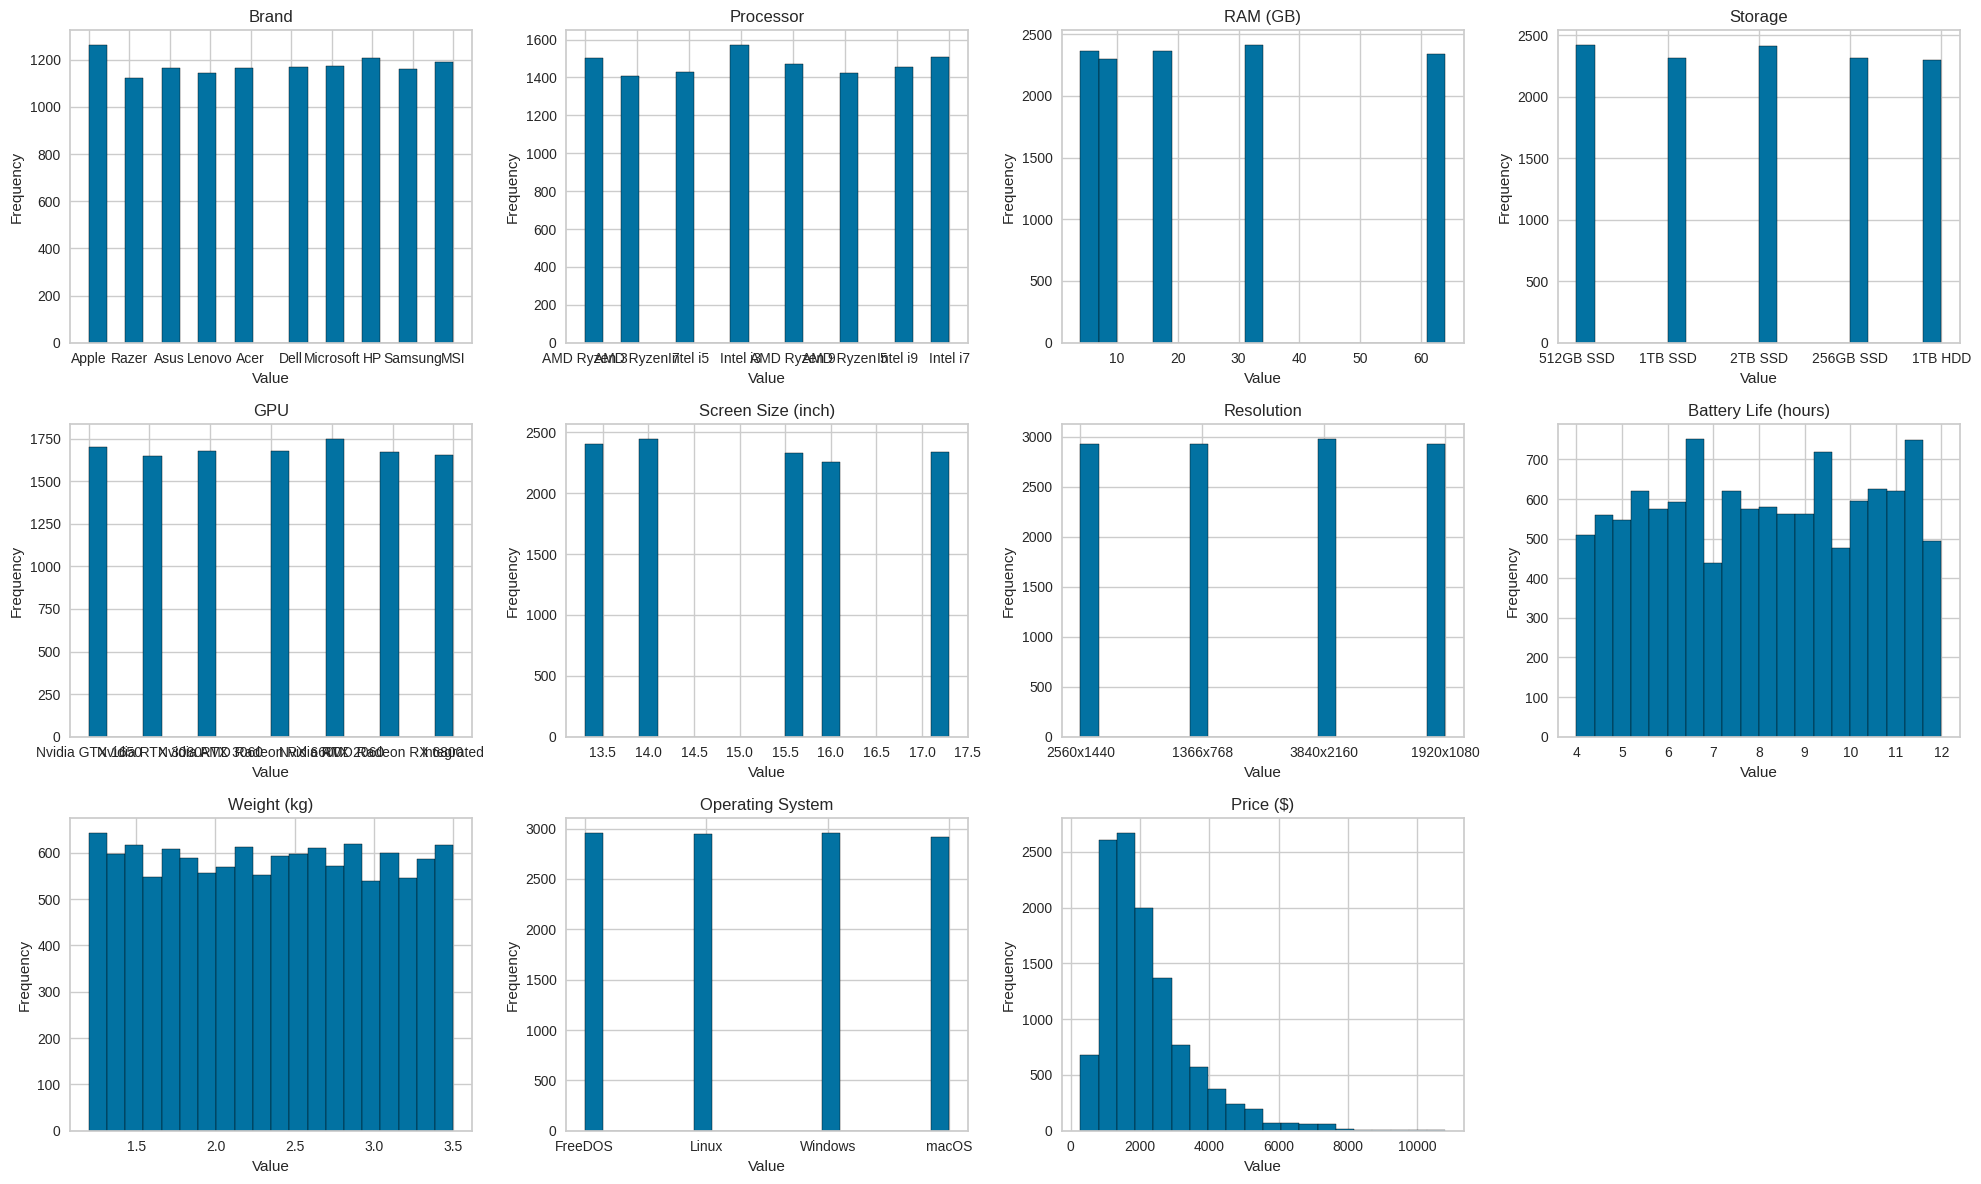

In [7]:
# Menghitung jumlah variabel
num_vars = df.shape[1] # Shape adalah Atribut yang mengembalikan jumlah baris dan kolom dalam bentuk tuple (jumlah_baris[0], jumlah_kolom[1]).

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan (untuk membuat visualisasi data)
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris ("untuk membuat visualisasi data")

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns): #i adalah sebuah index
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

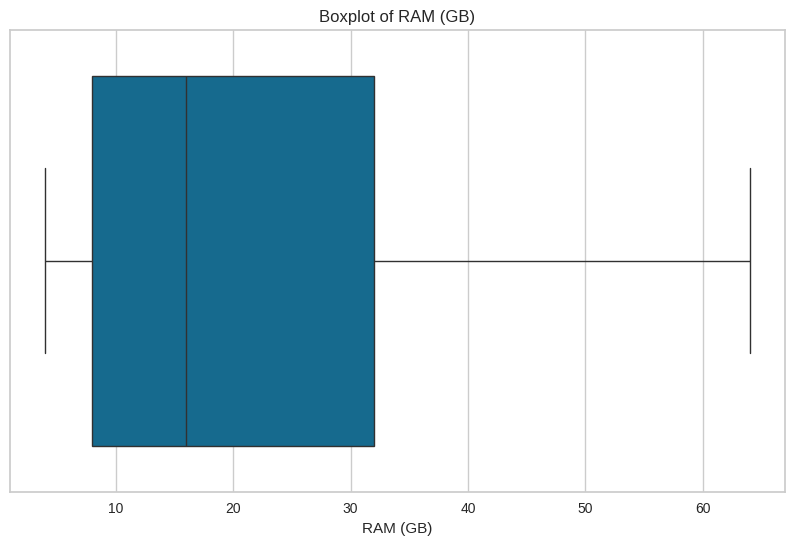

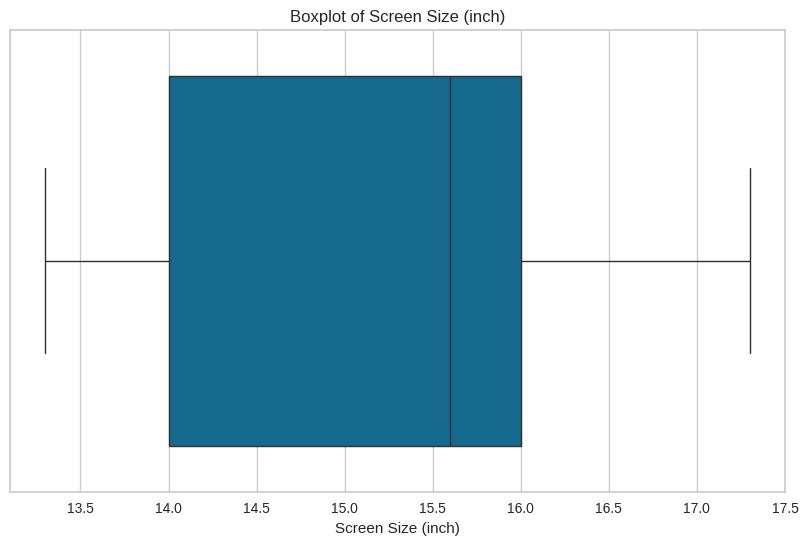

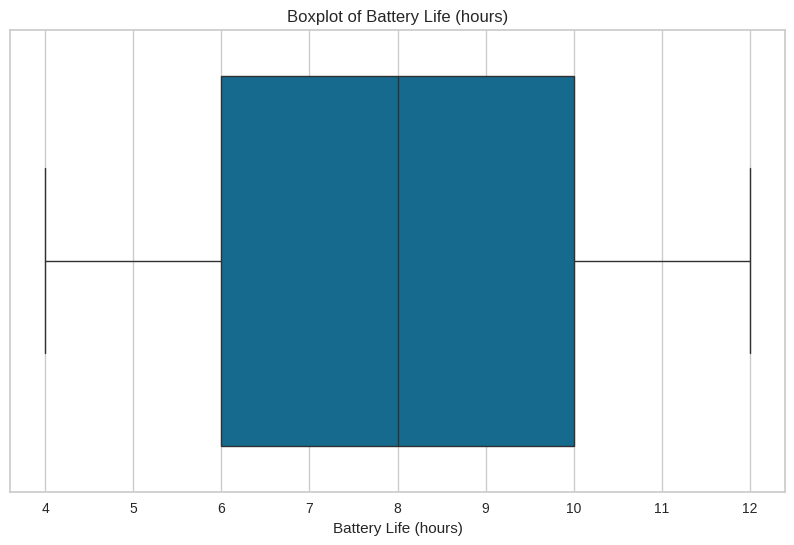

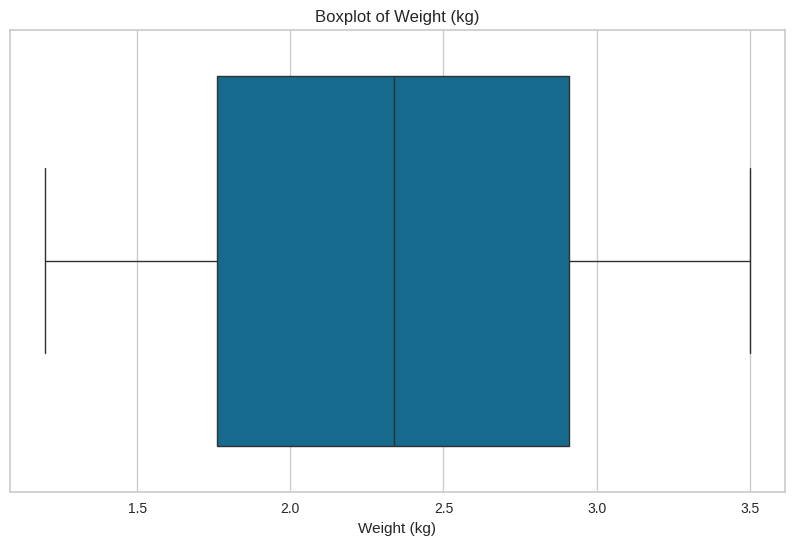

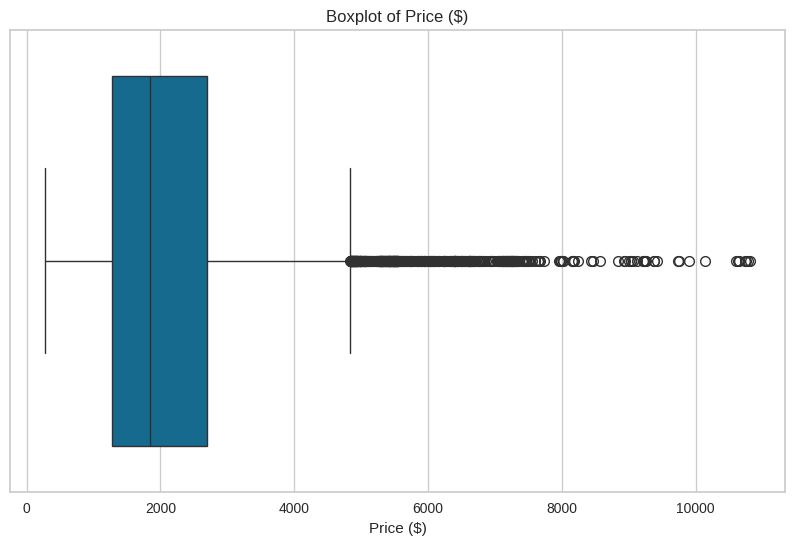

In [8]:
for features in num_features:
  plt.figure(figsize=(10,6))
  sns.boxplot(x=df[features])
  plt.title(f'Boxplot of {features}')
  plt.show

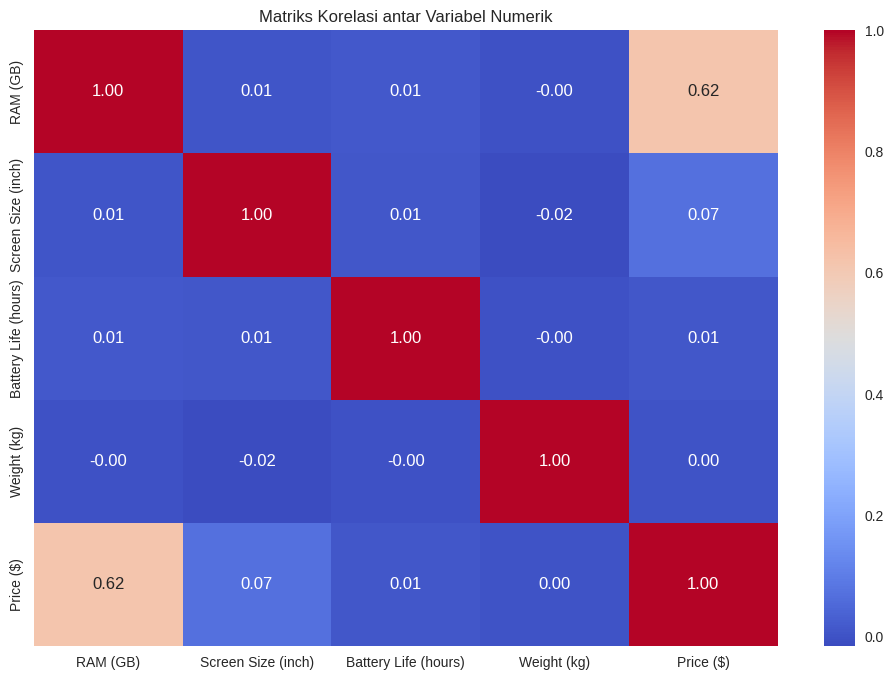

In [9]:
# Matriks Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi antar Variabel Numerik")
plt.show()

## 4. Visualisasi Data

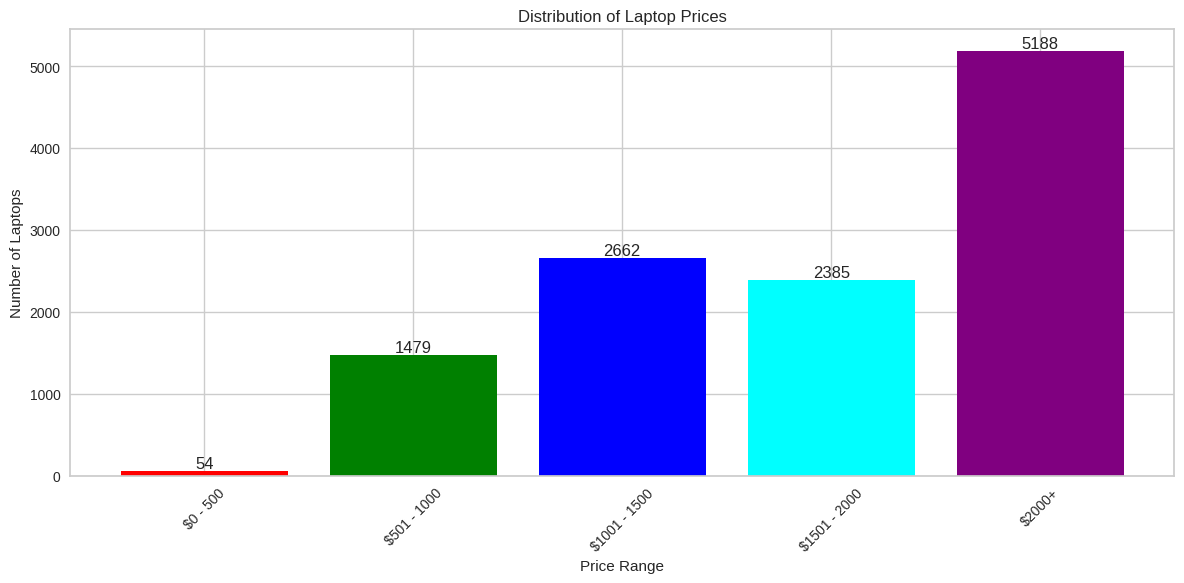

In [10]:
# Mengelompokkan harga laptop ke dalam kategori harga dan menghitung jumlah laptop di setiap kategori
p0_500 = df["Price ($)"][(df["Price ($)"] >= 0) & (df["Price ($)"] <= 500)]
p501_1000 = df["Price ($)"][(df["Price ($)"] > 500) & (df["Price ($)"] <= 1000)]
p1001_1500 = df["Price ($)"][(df["Price ($)"] > 1000) & (df["Price ($)"] <= 1500)]
p1501_2000 = df["Price ($)"][(df["Price ($)"] > 1500) & (df["Price ($)"] <= 2000)]
p2000up = df["Price ($)"][df["Price ($)"] > 2000]

# Menyusun data untuk plotting
price_labels = ["$0 - 500", "$501 - 1000", "$1001 - 1500", "$1501 - 2000", "$2000+"]
price_counts = [len(p0_500.values), len(p501_1000.values), len(p1001_1500.values), len(p1501_2000.values), len(p2000up.values)]

# Membuat bar chart untuk distribusi harga laptop
plt.figure(figsize=(12, 6))
plt.bar(price_labels, price_counts, color=['red', 'green', 'blue', 'cyan', 'purple'])
plt.title("Distribution of Laptop Prices")
plt.xlabel("Price Range")
plt.ylabel("Number of Laptops")
plt.xticks(rotation=45)

# Menambahkan label jumlah di atas setiap bar
for i in range(len(price_labels)):
    plt.text(i, price_counts[i], price_counts[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


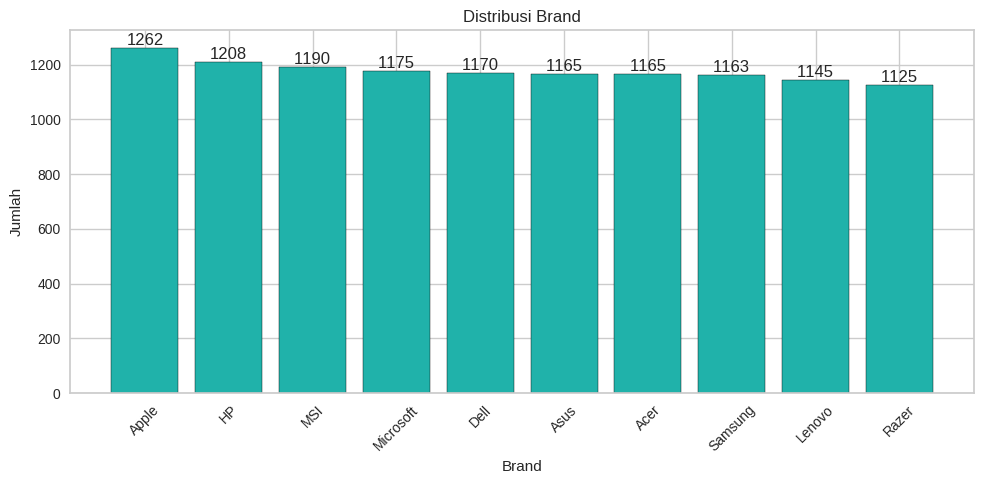

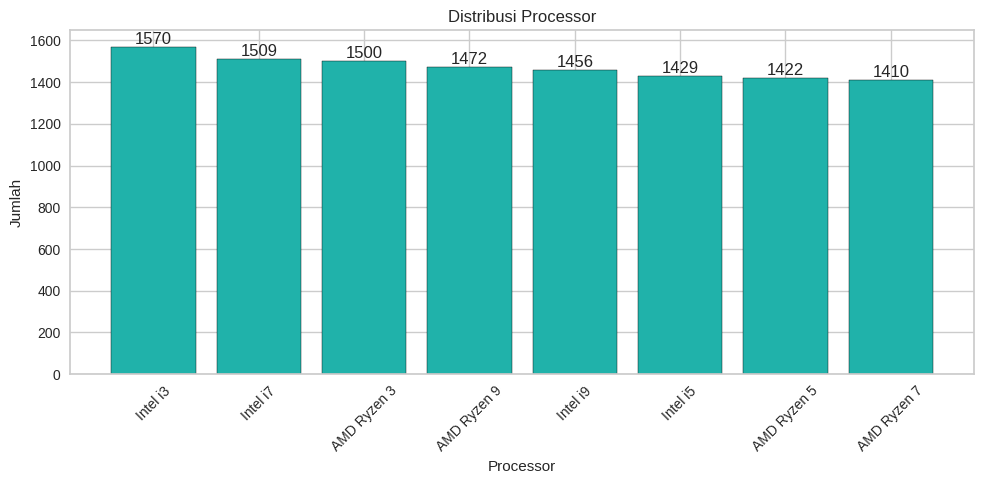

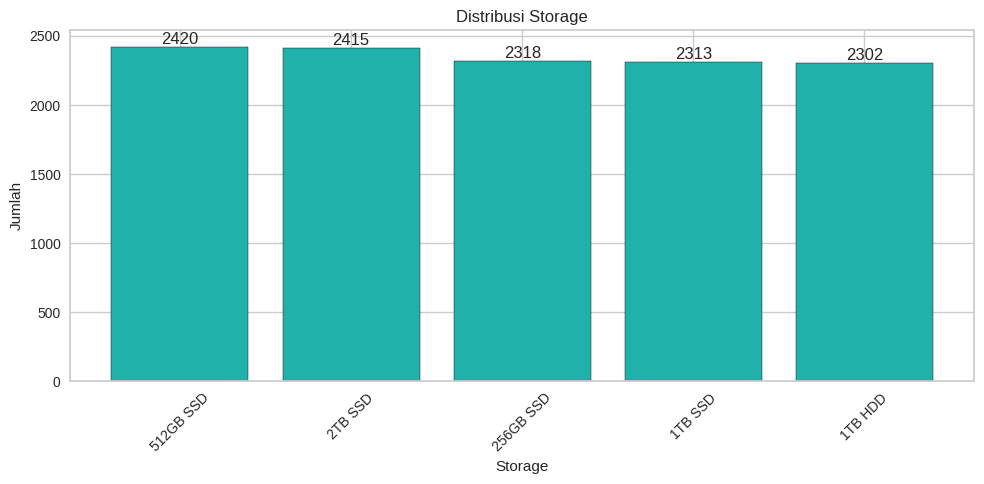

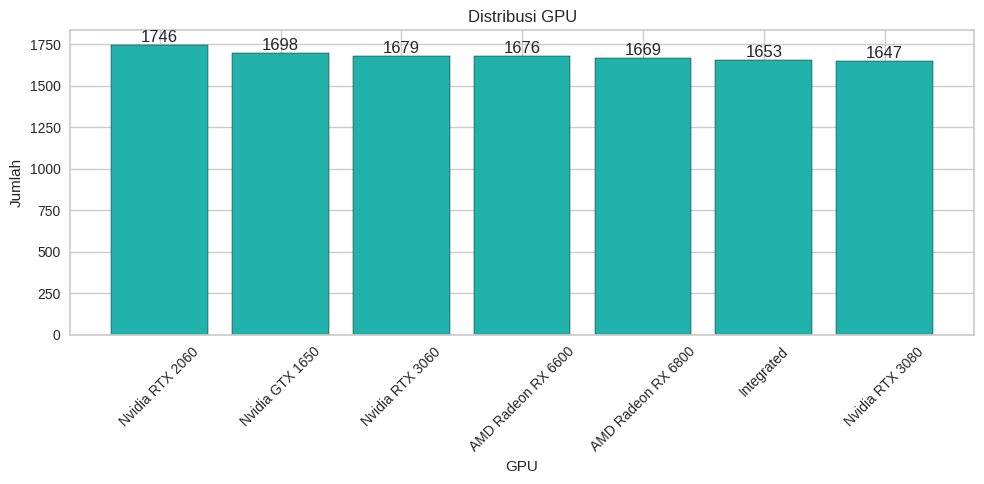

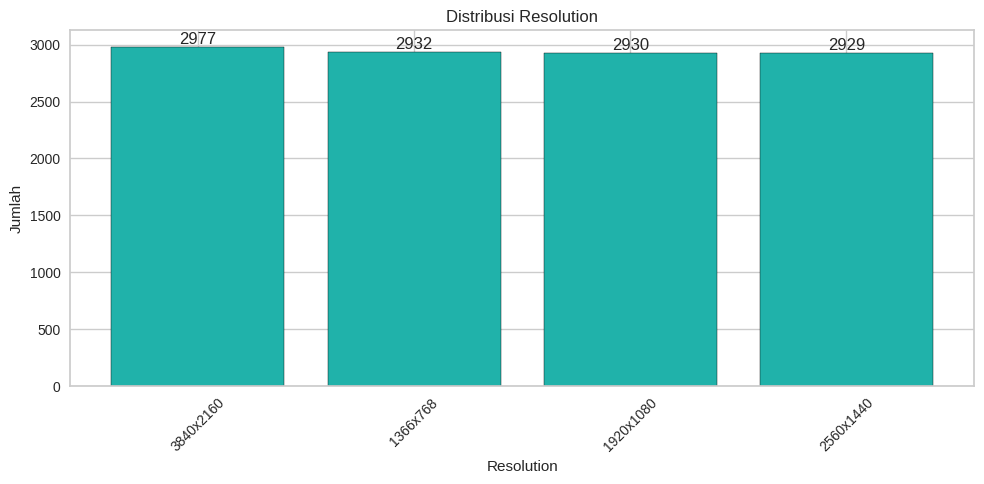

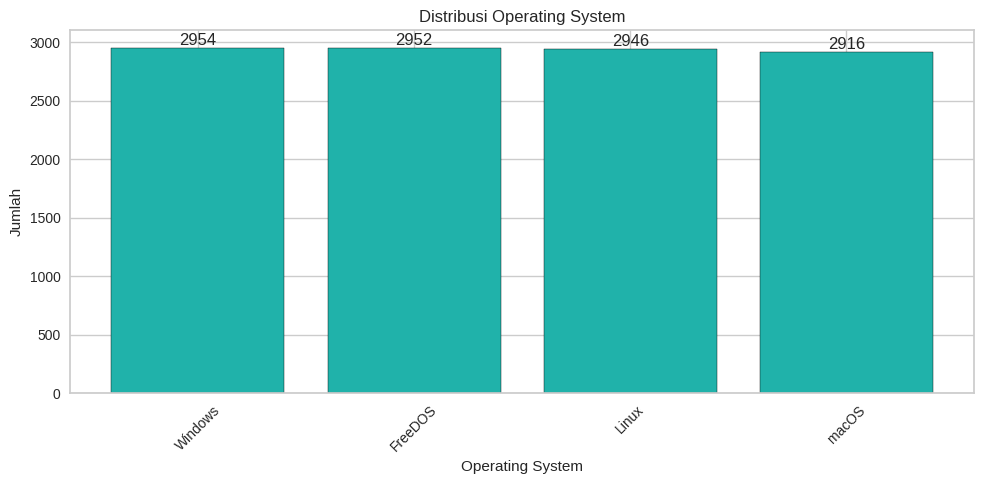

In [11]:


# Loop untuk membuat bar chart masing-masing kolom
for col in cat_features:
    plt.figure(figsize=(10, 5))
    value_counts = df[col].value_counts()

    # Bar chart
    plt.bar(value_counts.index, value_counts.values, color='lightseagreen', edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)

    # Menampilkan label di atas setiap bar
    for i in range(len(value_counts)):
        plt.text(i, value_counts.values[i], value_counts.values[i], ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## 1. Menghapus atau Menangani Data Kosong (Missing Values)

In [12]:
df.isnull().sum()

,0
Brand,0
Processor,0
RAM (GB),0
Storage,0
GPU,0
Screen Size (inch),0
Resolution,0
Battery Life (hours),0
Weight (kg),0
Operating System,0


## 2. Menghapus Data Duplikat

In [13]:
df.duplicated().sum()

0

## 3. Deteksi dan Penanganan Outlier

Disini data terlihat normal dan tidak ada outliers, terjadi Right Skewed pada Price ($) tetapi ini normal pada harga laptop.

Jadi Penanganan Outliers tidak diperlukan

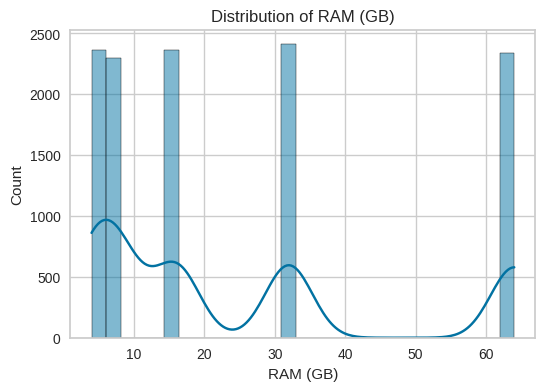

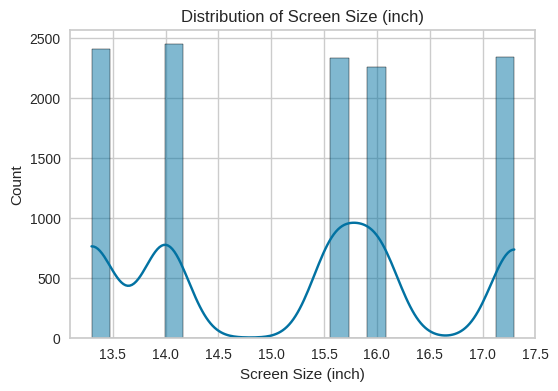

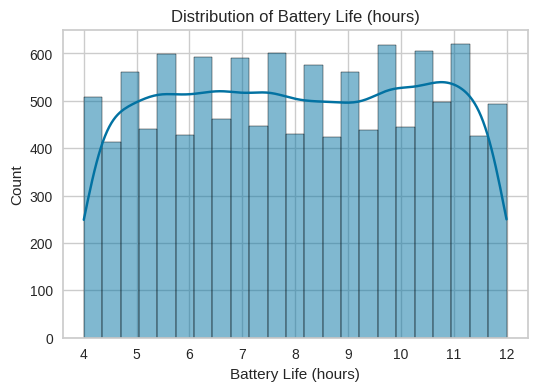

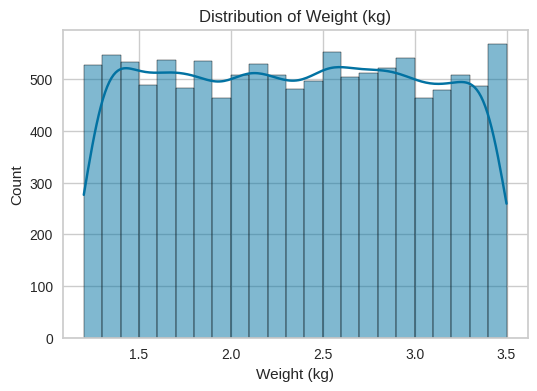

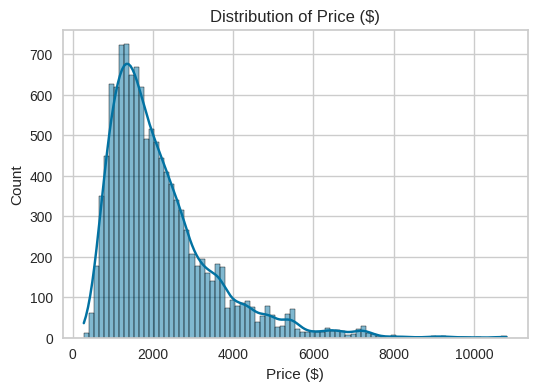

In [14]:
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [15]:
for col in num_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Kolom {col} punya {len(outliers)} outlier")


Kolom RAM (GB) punya 0 outlier
Kolom Screen Size (inch) punya 0 outlier
Kolom Battery Life (hours) punya 0 outlier
Kolom Weight (kg) punya 0 outlier
Kolom Price ($) punya 605 outlier


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 11768 non-null  object 
 1   Processor             11768 non-null  object 
 2   RAM (GB)              11768 non-null  int64  
 3   Storage               11768 non-null  object 
 4   GPU                   11768 non-null  object 
 5   Screen Size (inch)    11768 non-null  float64
 6   Resolution            11768 non-null  object 
 7   Battery Life (hours)  11768 non-null  float64
 8   Weight (kg)           11768 non-null  float64
 9   Operating System      11768 non-null  object 
 10  Price ($)             11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


## 4. Encoding Data Kategorikal

In [17]:
# Salin df asli agar tidak berubah
df_encoded = df.copy()

# Lanjutkan proses encoding di df_encoded saja
ohe = OneHotEncoder(sparse_output=False)

# Transform data kategorikal
ohe_temp = ohe.fit_transform(df_encoded[cat_features])

# Buat dataframe hasil encoding, pastikan index disamakan
df_ohe = pd.DataFrame(ohe_temp, columns=ohe.get_feature_names_out(cat_features), index=df_encoded.index)

# Gabungkan hasil encoding ke df_encoded
df_encoded = pd.concat([df_encoded, df_ohe], axis=1)

# Hapus kolom kategorikal asli dari df_encoded
df_encoded.drop(columns=cat_features, inplace=True)

# Tampilkan hasil df_encoded
df_encoded.head()


,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,...,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1366x768,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,64,17.3,8.9,1.42,3997.07,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,4,14.0,9.4,2.57,1355.78,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,32,13.3,8.5,1.74,2673.07,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,13.3,10.5,3.10,751.17,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,16.0,5.7,3.38,2059.83,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [18]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RAM (GB)                  11768 non-null  int64  
 1   Screen Size (inch)        11768 non-null  float64
 2   Battery Life (hours)      11768 non-null  float64
 3   Weight (kg)               11768 non-null  float64
 4   Price ($)                 11768 non-null  float64
 5   Brand_Acer                11768 non-null  float64
 6   Brand_Apple               11768 non-null  float64
 7   Brand_Asus                11768 non-null  float64
 8   Brand_Dell                11768 non-null  float64
 9   Brand_HP                  11768 non-null  float64
 10  Brand_Lenovo              11768 non-null  float64
 11  Brand_MSI                 11768 non-null  float64
 12  Brand_Microsoft           11768 non-null  float64
 13  Brand_Razer               11768 non-null  float64
 14  Brand_

## 5. Normalisasi atau Standarisasi Fitur

In [19]:
numerik_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)', 'Price ($)']

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerik_features] = scaler.fit_transform(df_encoded[numerik_features])

In [22]:
df_scaled

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,...,GPU_Nvidia RTX 3060,GPU_Nvidia RTX 3080,Resolution_1366x768,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,1.798907,1.452880,0.378321,-1.379139,1.377170,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.958237,-0.843674,0.595212,0.342695,-0.628624,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.328430,-1.330821,0.204808,-0.900020,0.371725,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.958237,-1.330821,1.072373,1.136236,-1.087765,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.958237,0.548177,-1.009783,1.555465,-0.093969,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,-0.958237,1.452880,1.506156,-1.139580,-1.122963,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11764,-0.958237,0.548177,0.638591,-0.301121,-1.069220,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11765,-0.958237,0.269807,0.074673,-0.435874,0.460111,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11766,-0.406808,-1.330821,-0.228974,-1.289305,-0.847825,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

## 1. Pilih algoritma clustering (K-Means)

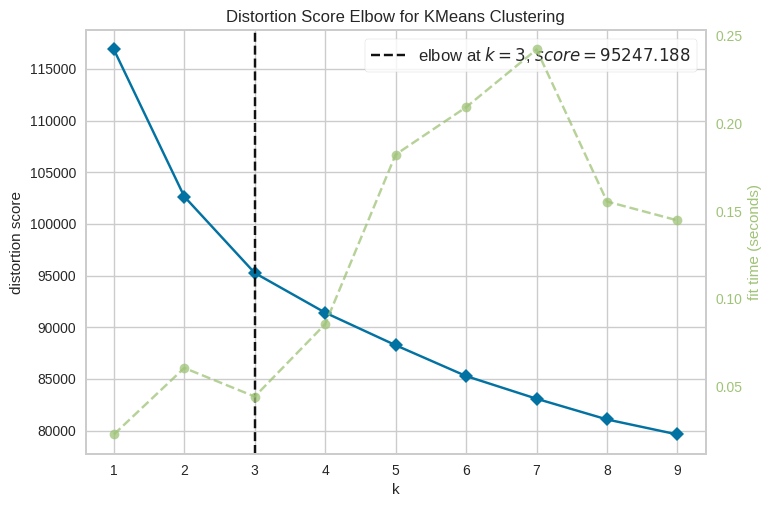

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
X = df_scaled.values

# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [24]:
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)

In [32]:
print("Silhouette Score KMeans: ", kmeans_score)

Silhouette Score KMeans:  0.07137846626607051


## 2. Latih model

In [27]:

# 7. Training model clustering (misal hasil elbow optimal = 4)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# 8. Evaluasi hasil clustering
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# 9. Tambahkan label cluster ke dataset
df_scaled['Cluster'] = labels

# 10. Analisis karakteristik per cluster (optional)
cluster_means = df_scaled.groupby('Cluster')[numerik_features].mean()
print("\nRata-rata fitur numerik per cluster:")
print(cluster_means)

Silhouette Score: 0.0920

Rata-rata fitur numerik per cluster:
         RAM (GB)  Screen Size (inch)  Battery Life (hours)  Weight (kg)  \
Cluster                                                                    
0        1.552414            0.022470              0.027933     0.018865   
1       -0.475315           -1.087571             -0.015268     0.012353   
2       -0.481315            0.769026             -0.003838    -0.018867   

         Price ($)  
Cluster             
0         1.204165  
1        -0.424699  
2        -0.333125  


In [29]:
cluster_order = df_scaled.groupby('Cluster')['Price ($)'].mean().sort_values().index.tolist()
label_map = {cluster_order[i]: label for i, label in enumerate(['Low Price', 'Medium Price', 'High Price'])}
df_scaled['Price_Segment'] = df_scaled['Cluster'].map(label_map)

# Tampilkan sebagian hasil
print(df_scaled[['Price ($)', 'Cluster', 'Price_Segment']].head())


   Price ($)  Cluster Price_Segment
0   1.377170        0    High Price
1  -0.628624        1     Low Price
2   0.371725        1     Low Price
3  -1.087765        1     Low Price
4  -0.093969        2  Medium Price


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [33]:

# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df_scaled
X = df_scaled.iloc[:, [1, 2, 3, 4, 10]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Processor','RAM (GB)', 'Storage', 'GPU','Price ($)']))

       Processor  RAM (GB)   Storage       GPU  Price ($)
0       1.452880  0.378321 -1.379139  1.377170        0.0
1      -0.843674  0.595212  0.342695 -0.628624        0.0
2      -1.330821  0.204808 -0.900020  0.371725        0.0
3      -1.330821  1.072373  1.136236 -1.087765        1.0
4       0.548177 -1.009783  1.555465 -0.093969        0.0
...          ...       ...       ...       ...        ...
11763   1.452880  1.506156 -1.139580 -1.122963        0.0
11764   0.548177  0.638591 -0.301121 -1.069220        0.0
11765   0.269807  0.074673 -0.435874  0.460111        0.0
11766  -1.330821 -0.228974 -1.289305 -0.847825        0.0
11767   1.452880 -0.706135  0.163025 -0.458694        0.0

[11768 rows x 5 columns]


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [35]:
# Split Resolution data to row & column pixel
df[["Row Pixel", "Column Pixel"]] = df["Resolution"].str.split("x", expand = True)

# Change data type from object to number
df["Row Pixel"] = df["Row Pixel"].astype("int")
df["Column Pixel"] = df["Column Pixel"].astype("int")

# Delete Resolution feature
df.drop("Resolution", axis = 1, inplace = True)

df.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160


In [36]:
# Add new feature("PPI")
df["PPI"] = 0
for i in range(len(df)):
    df["PPI"].loc[i] = np.sqrt((df["Row Pixel"].loc[i])**2 + (df["Column Pixel"].loc[i])**2) / df["Screen Size (inch)"].loc[i]
    df["PPI"].loc[i] = df["PPI"].loc[i].round()
df["PPI"] = df["PPI"].astype("int")
df.head()

<ipython-input-36-5ac3295b94a8>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["PPI"].loc[i] = np.sqrt((df["Row Pixel"].loc[i])**2 + (df["Column Pixel"].loc[i])**2) / df["Screen Size (inch)"].loc[i]
<ipython-input-36-5ac3295b94a8>:4: Se

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275


In [37]:
# Split Processor data to CPU Brand & CPU model
df[["CPU Brand", "CPU Model"]] = df["Processor"].str.split(" ", n = 1, expand = True)

# Delete Resolution feature
df.drop("Processor", axis = 1, inplace = True)

df.head()

,Brand,RAM (GB),Storage,GPU,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,CPU Brand,CPU Model
0,Apple,64,512GB SSD,Nvidia GTX 1650,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,AMD,Ryzen 3
1,Razer,4,1TB SSD,Nvidia RTX 3080,14.0,9.4,2.57,Linux,1355.78,1366,768,112,AMD,Ryzen 7
2,Asus,32,2TB SSD,Nvidia RTX 3060,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,Intel,i5
3,Lenovo,4,256GB SSD,Nvidia RTX 3080,13.3,10.5,3.10,Windows,751.17,1366,768,118,Intel,i5
4,Razer,4,256GB SSD,AMD Radeon RX 6600,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,Intel,i3


In [38]:
# Split Processor data to GPU Brand & GPU model
df[["GPU Brand", "GPU Model"]] = df["GPU"].str.split(" ", n = 1, expand = True)

# Delete GPU feature
df.drop("GPU", axis = 1, inplace = True)

df.head()

,Brand,RAM (GB),Storage,Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,CPU Brand,CPU Model,GPU Brand,GPU Model
0,Apple,64,512GB SSD,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,AMD,Ryzen 3,Nvidia,GTX 1650
1,Razer,4,1TB SSD,14.0,9.4,2.57,Linux,1355.78,1366,768,112,AMD,Ryzen 7,Nvidia,RTX 3080
2,Asus,32,2TB SSD,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,Intel,i5,Nvidia,RTX 3060
3,Lenovo,4,256GB SSD,13.3,10.5,3.10,Windows,751.17,1366,768,118,Intel,i5,Nvidia,RTX 3080
4,Razer,4,256GB SSD,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,Intel,i3,AMD,Radeon RX 6600


In [39]:
# Split Processor data to GPU Brand & GPU model
df[["Laptop Storage", "Storage Type"]] = df["Storage"].str.split(" ", n = 1, expand = True)

# Delete Storage feature
df.drop("Storage", axis = 1, inplace = True)

for i in range(len(df)):
    if df["Laptop Storage"].loc[i] == "256GB":
        df["Laptop Storage"].loc[i] = 256
    elif df["Laptop Storage"].loc[i] == "512GB":
        df["Laptop Storage"].loc[i] = 512
    elif df["Laptop Storage"].loc[i] == "1TB":
        df["Laptop Storage"].loc[i] = 1024
    elif df["Laptop Storage"].loc[i] == "2TB":
        df["Laptop Storage"].loc[i] = 2048

df["Laptop Storage"] = df["Laptop Storage"].astype("int")

df.head()

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Laptop Storage"].loc[i] = 2048
<ipython-input-39-a2e1edce083f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Laptop Storage"].loc[i] = 2048
<ipython-input-39-a2e1edce083f>:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you 

,Brand,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,CPU Brand,CPU Model,GPU Brand,GPU Model,Laptop Storage,Storage Type
0,Apple,64,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,AMD,Ryzen 3,Nvidia,GTX 1650,512,SSD
1,Razer,4,14.0,9.4,2.57,Linux,1355.78,1366,768,112,AMD,Ryzen 7,Nvidia,RTX 3080,1024,SSD
2,Asus,32,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,Intel,i5,Nvidia,RTX 3060,2048,SSD
3,Lenovo,4,13.3,10.5,3.10,Windows,751.17,1366,768,118,Intel,i5,Nvidia,RTX 3080,256,SSD
4,Razer,4,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,Intel,i3,AMD,Radeon RX 6600,256,SSD


In [40]:
# Drop useless features
df.drop(["CPU Brand", "GPU Brand"], axis = 1, inplace = True)
df.head()

,Brand,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,CPU Model,GPU Model,Laptop Storage,Storage Type
0,Apple,64,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,Ryzen 3,GTX 1650,512,SSD
1,Razer,4,14.0,9.4,2.57,Linux,1355.78,1366,768,112,Ryzen 7,RTX 3080,1024,SSD
2,Asus,32,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,i5,RTX 3060,2048,SSD
3,Lenovo,4,13.3,10.5,3.10,Windows,751.17,1366,768,118,i5,RTX 3080,256,SSD
4,Razer,4,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,i3,Radeon RX 6600,256,SSD


In [41]:
# Change categorical features to numerical ones by OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)
ohe_temp = ohe.fit_transform(df[["Brand", "Operating System", "CPU Model", "GPU Model", "Storage Type"]])
df_ohe = pd.DataFrame(ohe_temp, columns = ohe.get_feature_names_out(["Brand", "Operating System", "CPU Model", "GPU Model", "Storage Type"]))
df = pd.concat([df, df_ohe], axis=1)
df

,Brand,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Operating System,Price ($),Row Pixel,Column Pixel,PPI,...,CPU Model_i9,GPU Model_GTX 1650,GPU Model_RTX 2060,GPU Model_RTX 3060,GPU Model_RTX 3080,GPU Model_Radeon RX 6600,GPU Model_Radeon RX 6800,GPU Model_None,Storage Type_HDD,Storage Type_SSD
0,Apple,64,17.3,8.9,1.42,FreeDOS,3997.07,2560,1440,170,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Razer,4,14.0,9.4,2.57,Linux,1355.78,1366,768,112,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Asus,32,13.3,8.5,1.74,FreeDOS,2673.07,3840,2160,331,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Lenovo,4,13.3,10.5,3.10,Windows,751.17,1366,768,118,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Razer,4,16.0,5.7,3.38,Linux,2059.83,3840,2160,275,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,Acer,4,17.3,11.5,1.58,macOS,704.82,1366,768,91,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11764,Asus,4,16.0,9.5,2.14,Linux,775.59,1366,768,98,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
11765,Razer,4,15.6,8.2,2.05,Linux,2789.46,2560,1440,188,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11766,Samsung,16,13.3,7.5,1.48,macOS,1067.13,1920,1080,166,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [42]:
# Delete categorical features
df.drop(["Brand", "Operating System", "CPU Model", "GPU Model", "Storage Type"], axis = 1, inplace = True)
df.head()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),Row Pixel,Column Pixel,PPI,Laptop Storage,Brand_Acer,...,CPU Model_i9,GPU Model_GTX 1650,GPU Model_RTX 2060,GPU Model_RTX 3060,GPU Model_RTX 3080,GPU Model_Radeon RX 6600,GPU Model_Radeon RX 6800,GPU Model_None,Storage Type_HDD,Storage Type_SSD
0,64,17.3,8.9,1.42,3997.07,2560,1440,170,512,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,14.0,9.4,2.57,1355.78,1366,768,112,1024,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,32,13.3,8.5,1.74,2673.07,3840,2160,331,2048,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,13.3,10.5,3.10,751.17,1366,768,118,256,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,16.0,5.7,3.38,2059.83,3840,2160,275,256,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
# Relocate target("Price ($)") to end column
df1 = df.copy()
df.drop(["Price ($)"], axis = 1, inplace = True)
df = pd.concat([df, df1["Price ($)"]], axis = 1)
df1

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Row Pixel,Column Pixel,PPI,Laptop Storage,Brand_Acer,Brand_Apple,...,GPU Model_GTX 1650,GPU Model_RTX 2060,GPU Model_RTX 3060,GPU Model_RTX 3080,GPU Model_Radeon RX 6600,GPU Model_Radeon RX 6800,GPU Model_None,Storage Type_HDD,Storage Type_SSD,Price ($)
0,1.798907,1.452880,0.378321,-1.379139,0.143952,0.144102,-0.202282,-0.752185,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.377170
1,-0.958237,-0.843674,0.595212,0.342695,-1.148119,-1.148423,-0.999500,0.075001,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.628624
2,0.328430,-1.330821,0.204808,-0.900020,1.529087,1.528951,2.010686,1.729371,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.371725
3,-0.958237,-1.330821,1.072373,1.136236,-1.148119,-1.148423,-0.917029,-1.165777,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.087765
4,-0.958237,0.548177,-1.009783,1.555465,1.529087,1.528951,1.240958,-1.165777,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.093969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763,-0.958237,1.452880,1.506156,-1.139580,-1.148119,-1.148423,-1.288148,1.729371,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.122963
11764,-0.958237,0.548177,0.638591,-0.301121,-1.148119,-1.148423,-1.191932,1.729371,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.069220
11765,-0.958237,0.269807,0.074673,-0.435874,0.143952,0.144102,0.045131,1.729371,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.460111
11766,-0.406808,-1.330821,-0.228974,-1.289305,-0.548615,-0.548322,-0.257262,-0.752185,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.847825


## Build ML Model

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RAM (GB)                  11768 non-null  float64
 1   Screen Size (inch)        11768 non-null  float64
 2   Battery Life (hours)      11768 non-null  float64
 3   Weight (kg)               11768 non-null  float64
 4   Row Pixel                 11768 non-null  float64
 5   Column Pixel              11768 non-null  float64
 6   PPI                       11768 non-null  float64
 7   Laptop Storage            11768 non-null  float64
 8   Brand_Acer                11768 non-null  float64
 9   Brand_Apple               11768 non-null  float64
 10  Brand_Asus                11768 non-null  float64
 11  Brand_Dell                11768 non-null  float64
 12  Brand_HP                  11768 non-null  float64
 13  Brand_Lenovo              11768 non-null  float64
 14  Brand_

In [146]:
df1['Processor_Score'] = (
    1 * df1['CPU Model_i3'] +
    2 * df1['CPU Model_i5'] +
    3 * df1['CPU Model_i7'] +
    4 * df1['CPU Model_i9'] +
    1.5 * df1['CPU Model_Ryzen 3'] +
    2.5 * df1['CPU Model_Ryzen 5'] +
    3.5 * df1['CPU Model_Ryzen 7'] +
    4.5 * df1['CPU Model_Ryzen 9']
)


In [134]:
df1['GPU_Score'] = (
    1 * df1['GPU Model_None'] +
    2 * df1['GPU Model_GTX 1650'] +
    3 * df1['GPU Model_RTX 2060'] +
    4 * df1['GPU Model_RTX 3060'] +
    5 * df1['GPU Model_RTX 3080'] +
    3.5 * df1['GPU Model_Radeon RX 6600'] +
    4.5 * df1['GPU Model_Radeon RX 6800']
)


In [147]:
df1['Performance_Score'] = df1['Processor_Score'] + df1['GPU_Score'] + df1['RAM (GB)']
df1['Price_per_Performance'] = df1['Price ($)'] / df1['Performance_Score']


In [149]:
selected_features = ['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)',
                     'PPI', 'Processor_Score', 'GPU_Score',
                     'Performance_Score', 'Price_per_Performance', 'Price ($)']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1[selected_features])

In [282]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RAM (GB)                  11768 non-null  float64
 1   Screen Size (inch)        11768 non-null  float64
 2   Battery Life (hours)      11768 non-null  float64
 3   Weight (kg)               11768 non-null  float64
 4   Row Pixel                 11768 non-null  float64
 5   Column Pixel              11768 non-null  float64
 6   PPI                       11768 non-null  float64
 7   Laptop Storage            11768 non-null  float64
 8   Brand_Acer                11768 non-null  float64
 9   Brand_Apple               11768 non-null  float64
 10  Brand_Asus                11768 non-null  float64
 11  Brand_Dell                11768 non-null  float64
 12  Brand_HP                  11768 non-null  float64
 13  Brand_Lenovo              11768 non-null  float64
 14  Brand_

In [307]:
#X = df1[['RAM (GB)', 'Laptop Storage', 'Storage Type_HDD', 'Storage Type_SSD']].values
#print(pd.DataFrame(X, columns=['RAM (GB)', 'Laptop Storage', 'Storage Type_HDD', 'Storage Type_SSD']))
#X = df1[['Performance_Score', 'Price_per_Performance', 'Price ($)', 'Row Pixel', 'Column Pixel', 'PPI', 'GPU_Score',	'Processor_Score']].values
#print(pd.DataFrame(X, columns=['Performance_Score', 'Price_per_Performance', 'Price ($)', 'Row Pixel', 'Column Pixel', 'PPI', 'GPU_Score',	'Processor_Score']))

X = df1[['RAM (GB)', 'Storage Type_HDD', 'Storage Type_SSD']]
print(pd.DataFrame(X, columns=['RAM (GB)',  'Storage Type_HDD', 'Storage Type_SSD']))



       RAM (GB)  Storage Type_HDD  Storage Type_SSD
0      1.798907               0.0               1.0
1     -0.958237               0.0               1.0
2      0.328430               0.0               1.0
3     -0.958237               0.0               1.0
4     -0.958237               0.0               1.0
...         ...               ...               ...
11763 -0.958237               0.0               1.0
11764 -0.958237               0.0               1.0
11765 -0.958237               0.0               1.0
11766 -0.406808               0.0               1.0
11767 -0.774428               0.0               1.0

[11768 rows x 3 columns]


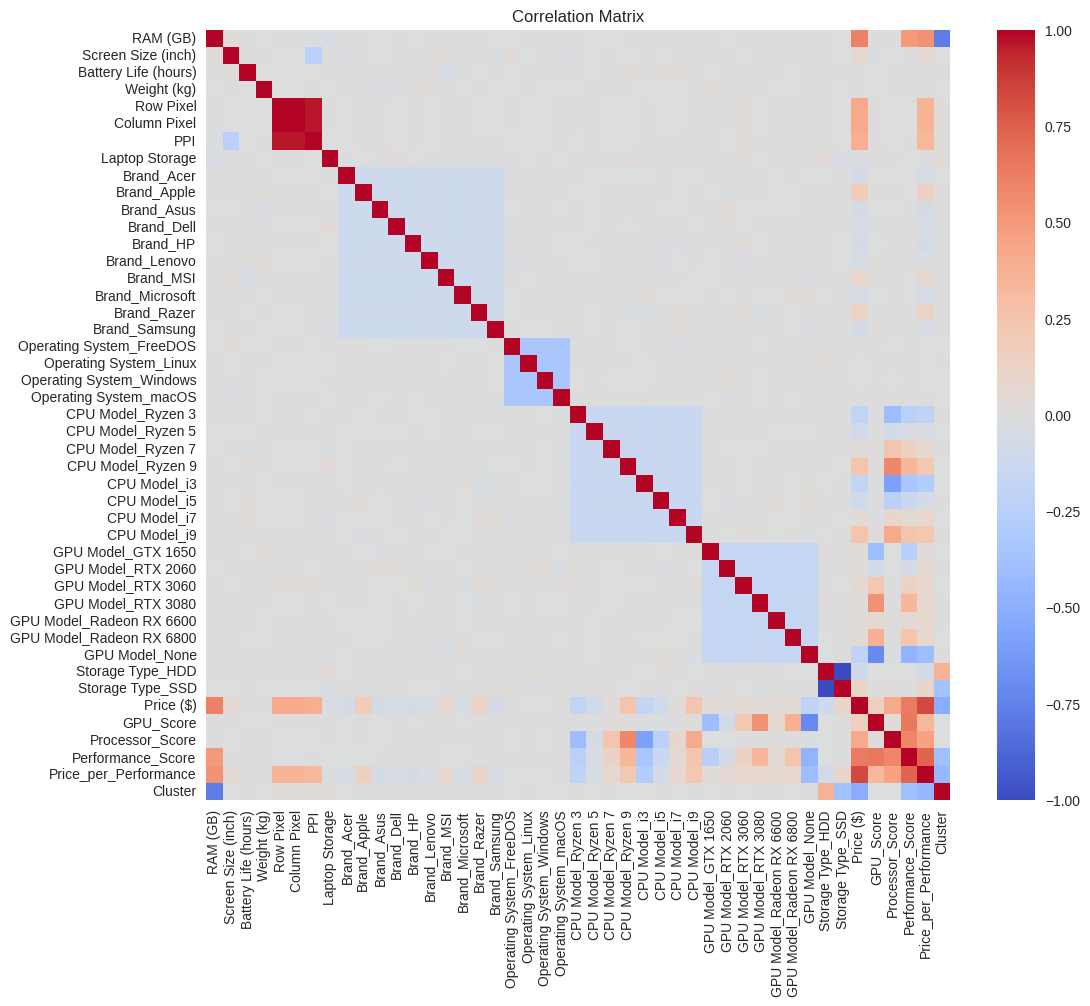

In [197]:

# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df1.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

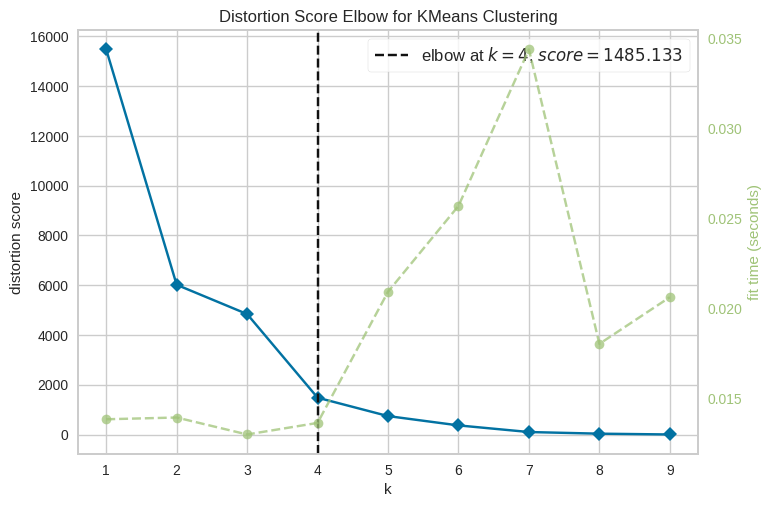

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [306]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [308]:
# 7. Training model clustering (misal hasil elbow optimal = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# 8. Evaluasi hasil clustering
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.4f}")

# 9. Tambahkan label cluster ke dataset
df1['Cluster'] = labels

# 10. Analisis karakteristik per cluster (optional)
cluster_means = df1.groupby('Cluster')[numerik_features].mean()
print("\nRata-rata fitur numerik per cluster:")
print(cluster_means)

Silhouette Score: 0.7662

Rata-rata fitur numerik per cluster:
         RAM (GB)  Screen Size (inch)  Battery Life (hours)  Weight (kg)  \
Cluster                                                                    
0        1.798907           -0.001098              0.037542     0.006352   
1       -0.714536           -0.011471             -0.005723     0.000094   
2       -0.440437            0.000844              0.001481     0.003262   
3        0.328430            0.033932             -0.030047    -0.011038   

         Price ($)  
Cluster             
0         1.095057  
1        -0.409405  
2        -0.441845  
3         0.290539  


In [289]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# KMeans ulang
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_pca)

# Cek silhouette
sil_score = silhouette_score(X_pca, labels)
print(f"Silhouette Score with PCA: {sil_score:.4f}")

Silhouette Score with PCA: 0.3472


In [44]:
# Split df with train & test
train = df.iloc[:8000, :]
test = df.iloc[8000:, :-1]
real_price = df.iloc[8000:, -1]

In [45]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
# Standardization of X_train & X_test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [47]:

# Inisialisasi dan latih model KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster untuk data latih
labels = kmeans.labels_

# Jika ingin melakukan prediksi cluster pada data baru (test set)
preds = kmeans.predict(test)

# Tampilkan hasil prediksi cluster
print("Predicted Cluster Labels:", preds)

Predicted Cluster Labels: [2 1 0 ... 2 0 2]


In [48]:
df.head(20)

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Row Pixel,Column Pixel,PPI,Laptop Storage,Brand_Acer,Brand_Apple,...,GPU Model_GTX 1650,GPU Model_RTX 2060,GPU Model_RTX 3060,GPU Model_RTX 3080,GPU Model_Radeon RX 6600,GPU Model_Radeon RX 6800,GPU Model_None,Storage Type_HDD,Storage Type_SSD,Price ($)
0,64,17.3,8.9,1.42,2560,1440,170,512,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3997.07
1,4,14.0,9.4,2.57,1366,768,112,1024,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1355.78
2,32,13.3,8.5,1.74,3840,2160,331,2048,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2673.07
3,4,13.3,10.5,3.10,1366,768,118,256,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,751.17
4,4,16.0,5.7,3.38,3840,2160,275,256,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2059.83
5,64,14.0,7.1,1.85,1366,768,112,2048,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1676.64
6,8,15.6,9.1,1.98,2560,1440,188,1024,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1449.05
7,8,17.3,9.8,1.26,2560,1440,170,1024,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2193.55
8,64,15.6,11.5,1.48,3840,2160,282,256,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6409.03
9,4,14.0,7.5,2.19,3840,2160,315,1024,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1556.72


In [75]:
# Hitung Silhouette Score
score = silhouette_score(X, labels)

print(f"Silhouette Score: {score}")

Silhouette Score: 0.10668343604858394


In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X_pca)

score = silhouette_score(X_pca, labels)
print("Silhouette Score setelah PCA:", score)


Silhouette Score setelah PCA: 0.46380790347350925


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.